In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [242]:
df = pd.read_csv('../datasets/Mall_Customers_clustring.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [243]:
df = pd.get_dummies(df, columns = ['Gender'])
X = df.loc[:,'Age':]
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [244]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=2)
labels = clf.fit_predict(X)
np.unique(labels , return_counts =True)

(array([-1,  1]), array([ 12, 188]))

In [245]:
X = X[labels==1]

In [246]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

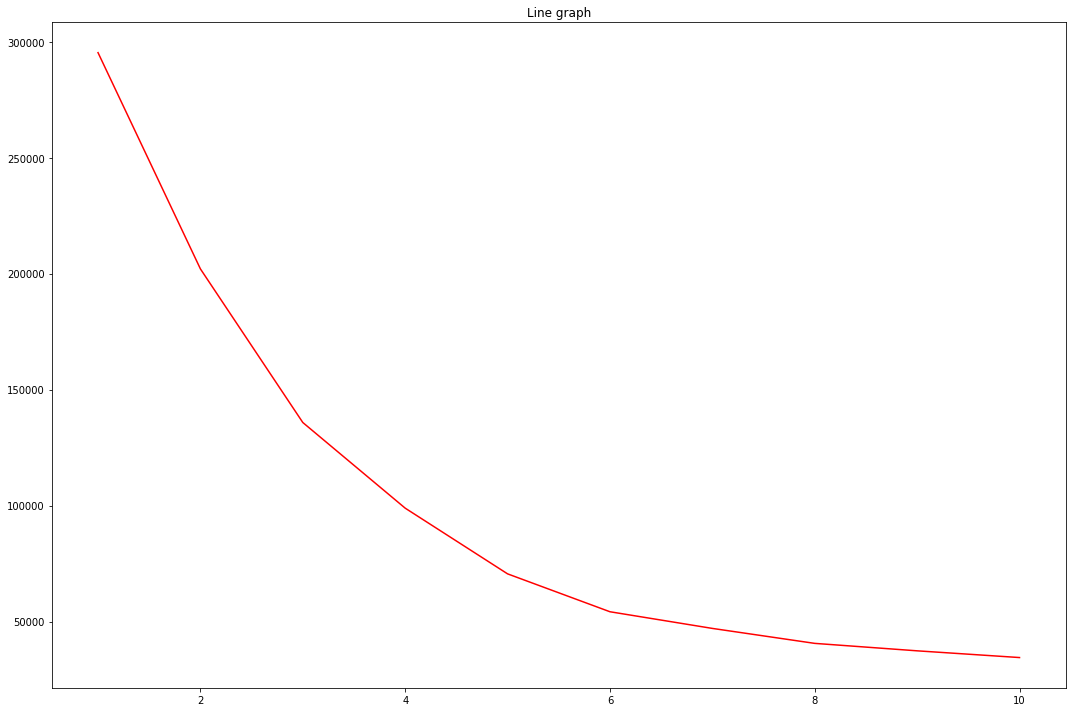

In [247]:
plt.rcParams["figure.figsize"] = [15,10]
plt.rcParams["figure.autolayout"] = True
plt.title("Line graph")

plt.plot(range(1, 11), wcss, color="red")

In [248]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)


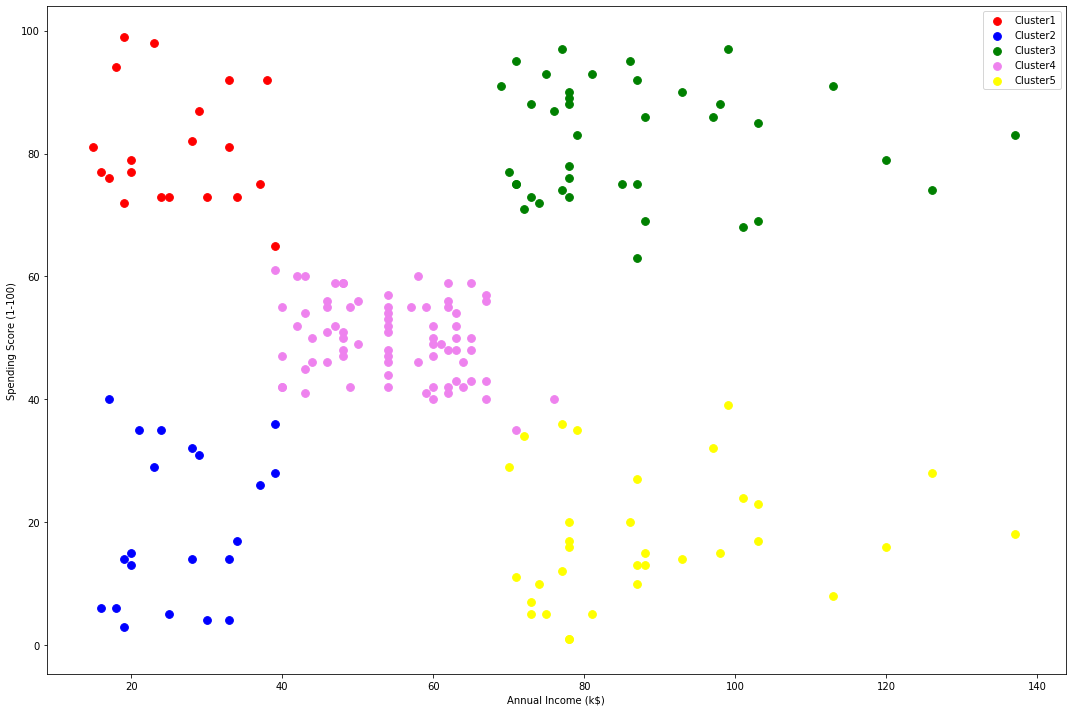

In [249]:

plt.rcParams["figure.figsize"] = [15,10]
plt.scatter( X[y_kmeans == 0].loc[:,'Annual Income (k$)'], X[y_kmeans == 0].loc[:,'Spending Score (1-100)'], s = 60, c = 'red', label = 'Cluster1')
plt.scatter( X[y_kmeans == 1].loc[:,'Annual Income (k$)'], X[y_kmeans == 1].loc[:,'Spending Score (1-100)'], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( X[y_kmeans == 2].loc[:,'Annual Income (k$)'], X[y_kmeans == 2].loc[:,'Spending Score (1-100)'], s = 60, c = 'green', label = 'Cluster3')
plt.scatter( X[y_kmeans == 3].loc[:,'Annual Income (k$)'], X[y_kmeans == 3].loc[:,'Spending Score (1-100)'], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter( X[y_kmeans == 4].loc[:,'Annual Income (k$)'], X[y_kmeans == 4].loc[:,'Spending Score (1-100)'], s = 60, c = 'yellow', label = 'Cluster5')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.legend() 
plt.show()

In [250]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

silu = []
for i in np.arange(5, 22): 
    dbscan = DBSCAN(eps = i)
    dbscan.fit(X) 
    if(len(np.unique(dbscan.labels_))>1):
        silu.append(silhouette_score(X, dbscan.labels_, metric='euclidean'))
    else :
        silu.append(-2)

In [251]:
np.max(silu)

0.36419286785274596

In [252]:
np.argmax(silu, axis=0)

13

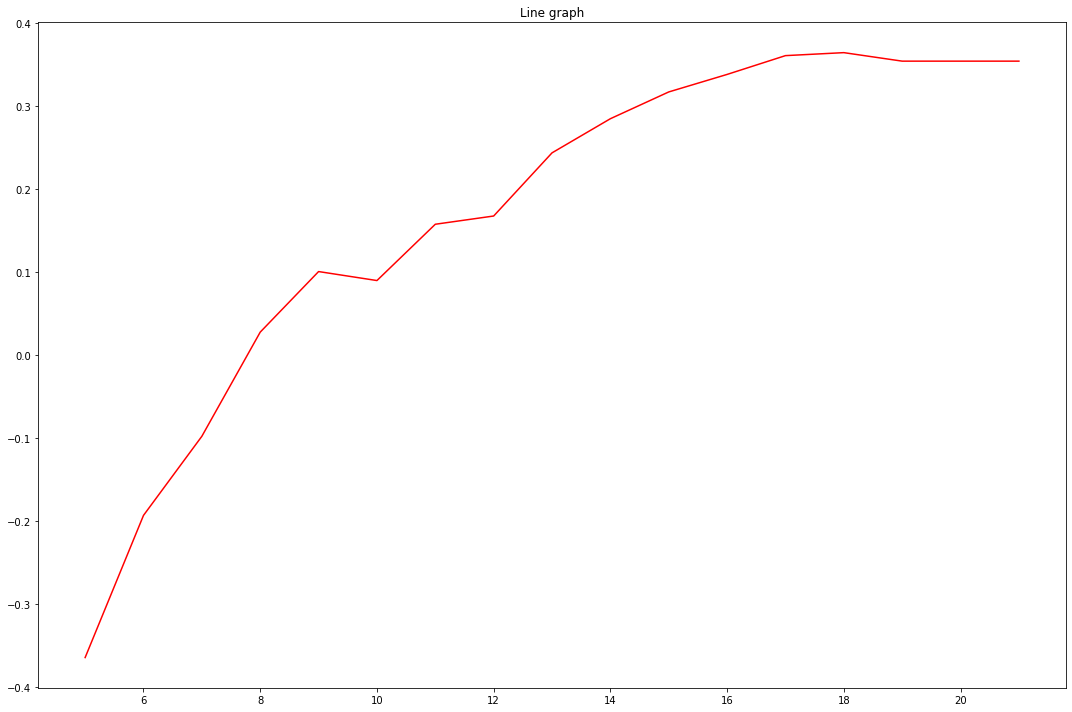

In [253]:
plt.rcParams["figure.figsize"] = [15,10]
plt.rcParams["figure.autolayout"] = True
plt.title("Line graph")
plt.plot(range(5, 22), silu, color="red")

In [254]:
dbscan = DBSCAN(eps = 13)
dbscan.fit(X) 
np.unique(dbscan.labels_)
labels = dbscan.labels_

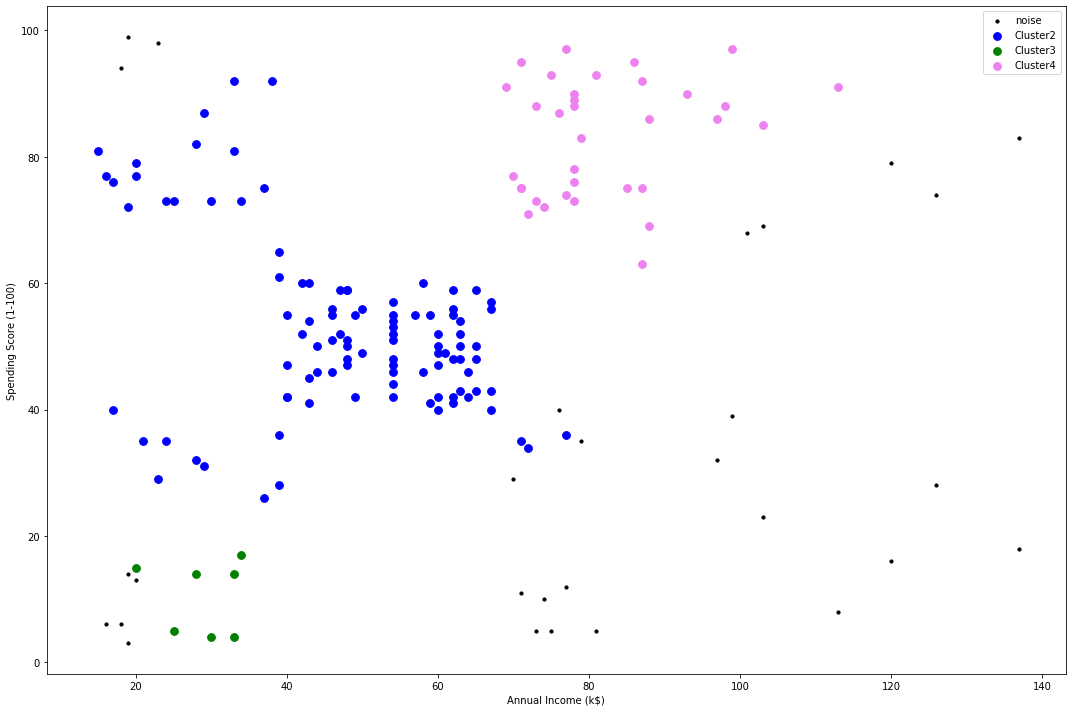

In [255]:
plt.rcParams["figure.figsize"] = [15,10]
plt.scatter( X[labels == -1].loc[:,'Annual Income (k$)'], X[labels == -1].loc[:,'Spending Score (1-100)'], s = 10, c = 'black', label = 'noise')
plt.scatter( X[labels == 0].loc[:,'Annual Income (k$)'], X[labels == 0].loc[:,'Spending Score (1-100)'], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( X[labels == 1].loc[:,'Annual Income (k$)'], X[labels == 1].loc[:,'Spending Score (1-100)'], s = 60, c = 'green', label = 'Cluster3')
plt.scatter( X[labels == 2].loc[:,'Annual Income (k$)'], X[labels == 2].loc[:,'Spending Score (1-100)'], s = 60, c = 'violet', label = 'Cluster4')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.legend() 
plt.show()

In [256]:
from sklearn.cluster import SpectralClustering
spk = SpectralClustering(n_clusters=5,assign_labels='discretize',random_state=0).fit(X)


In [257]:
siluspk = []
for i in np.arange(2, 50): 
    spk = SpectralClustering(n_clusters=i,assign_labels='discretize',random_state=0)
    spk.fit(X) 
    if(len(np.unique(spk.labels_))>1):
        siluspk.append(silhouette_score(X, spk.labels_, metric='euclidean'))
    else :
        siluspk.append(-2)

In [258]:
np.max(siluspk)

0.20483250638353243

In [259]:
np.argmax(siluspk, axis=0)

2

In [260]:
spk = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0).fit(X)

In [261]:
labels = spk.labels_

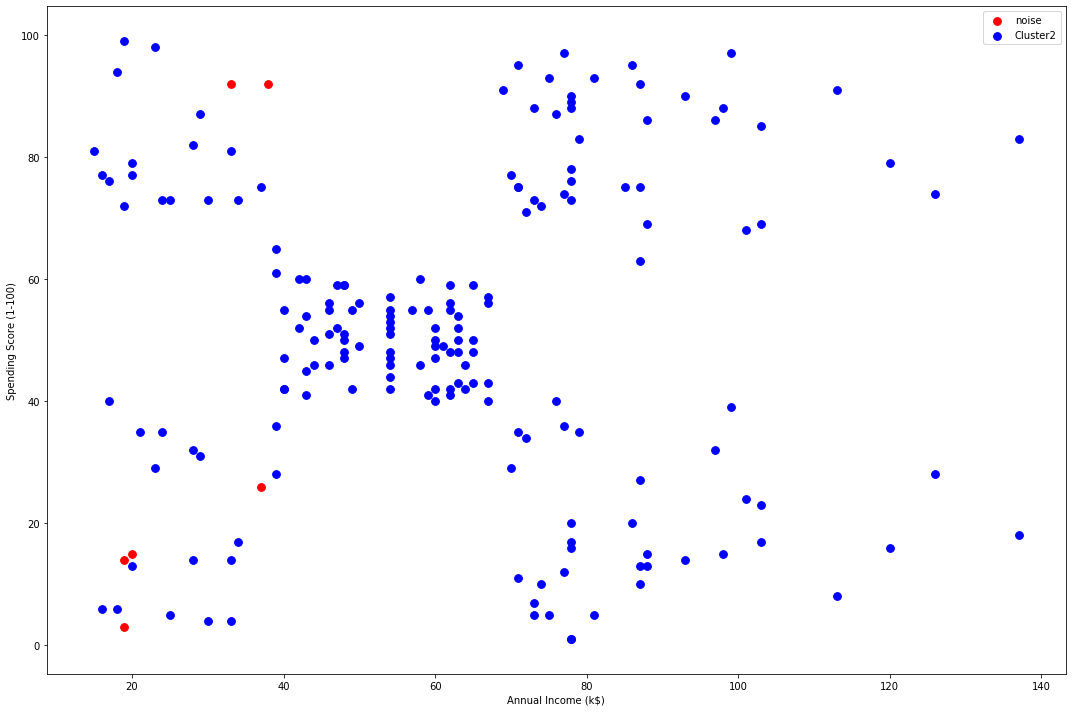

In [262]:
plt.rcParams["figure.figsize"] = [15,10]
plt.scatter( X[labels == 1].loc[:,'Annual Income (k$)'], X[labels == 1].loc[:,'Spending Score (1-100)'], s = 60, c = 'red', label = 'noise')
plt.scatter( X[labels == 0].loc[:,'Annual Income (k$)'], X[labels == 0].loc[:,'Spending Score (1-100)'], s = 60, c = 'blue', label = 'Cluster2')

plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.legend() 
plt.show()

In [263]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=25).fit(X)
np.unique(ms.labels_)

array([0, 1, 2, 3, 4])

In [264]:
ms = MeanShift(bandwidth = 3)
ms.fit(X)
silhouette_score(X, ms.labels_, metric='euclidean')

0.07416912509689493

In [265]:
silums = []
for i in np.arange(2, 100): 
    ms = MeanShift(bandwidth = i)
    ms.fit(X) 
    if(len(np.unique(ms.labels_))>2):
        silums.append(silhouette_score(X, ms.labels_, metric='euclidean'))
    else :
        silums.append(-2)

In [266]:
np.max(silums)

0.45268083206181947

In [267]:
np.argmax(silums, axis=0)

21

In [268]:
ms = MeanShift(bandwidth = 20)
ms.fit(X) 
labels = ms.labels_
np.unique(lables)

array([0, 1, 2, 3, 4, 5, 6, 7])

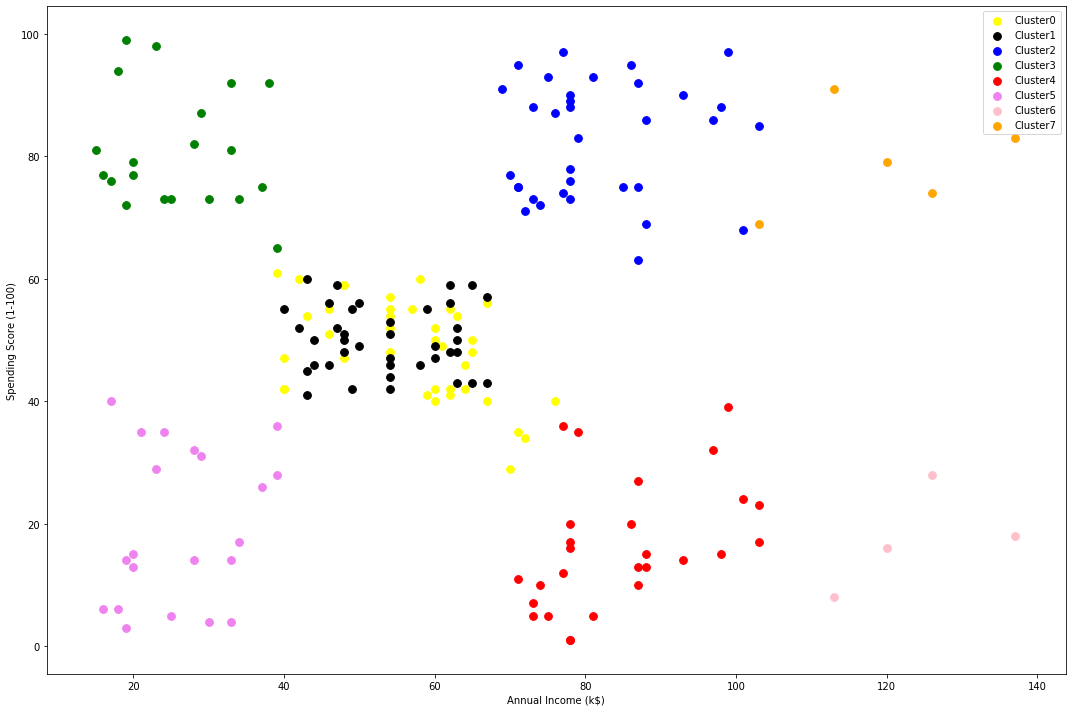

In [269]:
plt.rcParams["figure.figsize"] = [15,10]
plt.scatter( X[labels == 0].loc[:,'Annual Income (k$)'], X[labels == 0].loc[:,'Spending Score (1-100)'], s = 60, c = 'yellow', label = 'Cluster0')
plt.scatter( X[labels == 1].loc[:,'Annual Income (k$)'], X[labels == 1].loc[:,'Spending Score (1-100)'], s = 60, c = 'black', label = 'Cluster1')
plt.scatter( X[labels == 2].loc[:,'Annual Income (k$)'], X[labels == 2].loc[:,'Spending Score (1-100)'], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( X[labels == 3].loc[:,'Annual Income (k$)'], X[labels == 3].loc[:,'Spending Score (1-100)'], s = 60, c = 'green', label = 'Cluster3')
plt.scatter( X[labels == 4].loc[:,'Annual Income (k$)'], X[labels == 4].loc[:,'Spending Score (1-100)'], s = 60, c = 'red', label = 'Cluster4')
plt.scatter( X[labels == 5].loc[:,'Annual Income (k$)'], X[labels == 5].loc[:,'Spending Score (1-100)'], s = 60, c = 'violet', label = 'Cluster5')
plt.scatter( X[labels == 6].loc[:,'Annual Income (k$)'], X[labels == 6].loc[:,'Spending Score (1-100)'], s = 60, c = 'pink', label = 'Cluster6')
plt.scatter( X[labels == 7].loc[:,'Annual Income (k$)'], X[labels == 7].loc[:,'Spending Score (1-100)'], s = 60, c = 'orange', label = 'Cluster7')



plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.legend() 
plt.show()